In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.30


In [33]:
def build(robot):
    Disk(robot,x=3,y=5,radius=1,name='bob')
    

In [34]:
def act(t,robot):
    distance=robot['bob'].read_distance()
    
    if distance<5:
        robot['bob'].τ=1
        robot['bob'].F=-10
    else:
        robot['bob'].F=10
        robot['bob'].τ=0
        

In [35]:
# def act(t,robot):
#     distance=robot['bob'].read_distance()
    
#     if distance<2:
#         robot['bob'].τ=0
#         robot['bob'].F=0
#     else:
#         robot['bob'].F=10
#         robot['bob'].τ=0
        

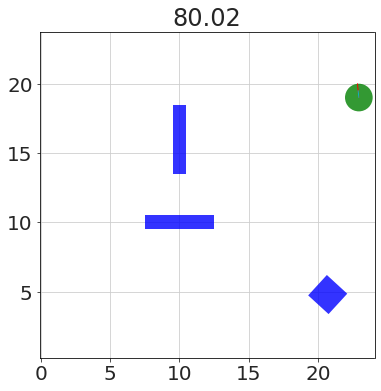

In [37]:
env=FrictionEnvironment(24,24)
robot=Robot(env)
build(robot)

Box(env,x=10,y=10,width=5,height=1)
Box(env,x=10,y=16,width=1,height=5)
Box(env,x=20,y=5,width=2,height=2)


run_sim(env,act,
        figure_width=6,
        total_time=80,  # seconds
        dt_display=1,  # make this larger for a faster display
       )

In [49]:
def build(robot):
    bob=Disk(robot,x=3,y=5,radius=.5,name='bob')
    sally=Disk(robot,x=3,y=3.8,radius=.5,name='sally')
    
    connect(bob,sally,'weld')
    

In [52]:
def act(t,robot):
    distance1=robot['bob'].read_distance()
    distance2=robot['sally'].read_distance()
    
    if distance1<5 or distance2<5:
        robot['bob'].τ=1
        robot['bob'].F=-10
        robot['sally'].τ=1
        robot['sally'].F=-10
    else:
        robot['bob'].F=10
        robot['bob'].τ=0
        robot['sally'].τ=0
        robot['sally'].F=10
        

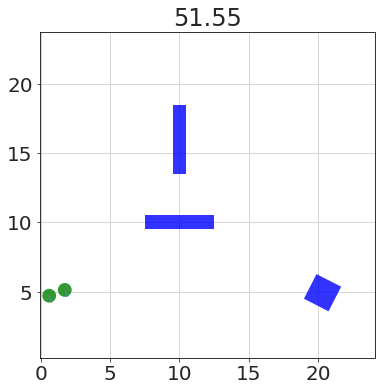

In [53]:
env=FrictionEnvironment(24,24)
robot=Robot(env)
build(robot)

Box(env,x=10,y=10,width=5,height=1)
Box(env,x=10,y=16,width=1,height=5)
Box(env,x=20,y=5,width=2,height=2)


run_sim(env,act,
        figure_width=6,
        total_time=80,  # seconds
        dt_display=.1,  # make this larger for a faster display
       )

In [57]:
def build(robot):
    
    r_center=0.5
    r_sensor=0.3
    
    center=Disk(robot,x=3,y=5,radius=r_center,name='center')
    right=Disk(robot,x=3+r_center+r_sensor+0.02,y=5,radius=r_sensor,name='right')
    left=Disk(robot,x=3-r_center-r_sensor-0.02,y=5,radius=r_sensor,angle=180,name='left')
    
    
    connect(center,right,'weld')
    connect(center,left,'weld')
    

In [58]:
def act(t,robot):
    distance_right=robot['right'].read_distance()
    distance_left=robot['left'].read_distance()
    
    if distance_right<5 or distance_left<5:
        robot['center'].τ=1
        robot['center'].F=-10
    else:
        robot['center'].τ=0
        robot['center'].F=10
        

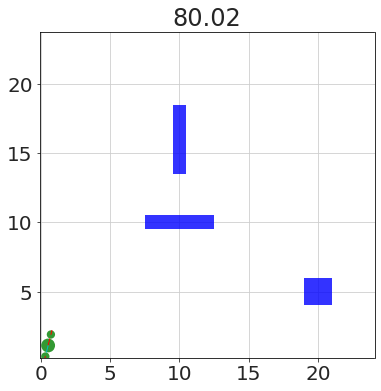

In [59]:
env=FrictionEnvironment(24,24)
robot=Robot(env)
build(robot)

Box(env,x=10,y=10,width=5,height=1)
Box(env,x=10,y=16,width=1,height=5)
Box(env,x=20,y=5,width=2,height=2)


run_sim(env,act,
        figure_width=6,
        total_time=80,  # seconds
        dt_display=.1,  # make this larger for a faster display
       )

## Behaviors

In [63]:
def build(robot):
    Disk(robot,x=3,y=5,radius=.5,name='bob')
    

In [64]:
def act(t,robot):
    distance=robot['bob'].read_distance()
    
    if distance<5:
        robot['bob'].F=-10
    else:
        robot['bob'].F=10
        

<Figure size 432x432 with 0 Axes>

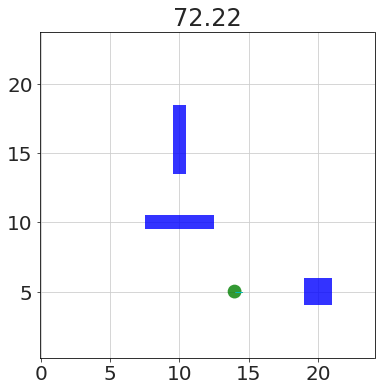

In [65]:
env=FrictionEnvironment(24,24)
robot=Robot(env)
build(robot)

Box(env,x=10,y=10,width=5,height=1)
Box(env,x=10,y=16,width=1,height=5)
Box(env,x=20,y=5,width=2,height=2)


run_sim(env,act,
        figure_width=6,
        total_time=80,  # seconds
        dt_display=.1,  # make this larger for a faster display
       )

In [67]:
def go_forward(t,robot):
    robot['bob'].F=10
    return True

def go_backward(t,robot):
    robot['bob'].F=-10
    return True


In [68]:
def until_close(t,robot):
    distance=robot['bob'].read_distance()
    
    if distance<5:
        return True
    

In [71]:
def until_far(t,robot):
    distance=robot['bob'].read_distance()
    
    if distance>10:
        return True
    

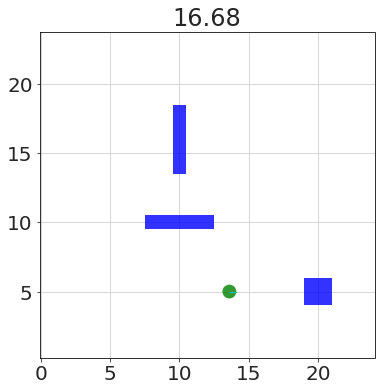

In [72]:
env=FrictionEnvironment(24,24)
robot=Robot(env)
build(robot)

Box(env,x=10,y=10,width=5,height=1)
Box(env,x=10,y=16,width=1,height=5)
Box(env,x=20,y=5,width=2,height=2)


run_sim(env,[go_forward,until_close,go_backward,until_far],
        figure_width=6,
        total_time=80,  # seconds
        dt_display=.1,  # make this larger for a faster display
       )